In [13]:
#Import binomial and uniform from the stats module of the scipy library
from scipy.stats import binom,uniform
from scipy.stats import norm,truncnorm
#import random number generator (psuedo) for binom and normal distrib.
import random
#import plotting curves
#Remember that importing is case-sensitive! 
import matplotlib.pyplot as plt
import numpy as np
#Data analysis tool import
import pandas as pd


In [2]:
# Defining the data
flips = ["H","T","T","T","H"]
# flips = flips*100  # Uncomment (and modify) this line to create a more informative dataset
trials = len(flips)        # Number (n) of binomial trials
successes = sum([1 for fl in flips if fl == "H"])  # Counting heads as successes (k)

In [3]:
#Calculating the PMF for a successes k, random number of trials n, and probability, in that order! 
#Testing to see that a random library imported correctly 
pmf1=binom.pmf(1,10,0.6)
print(pmf1)

0.001572864


In [4]:
def like(successes,trials,prob,testingPrior=False):
    if testingPrior:  # If True, this will always return 1. This can be useful if one wants
        return 1      # to test the machinery by estimating a known distribution (the prior).
    if prob < 0:
        return 0
    elif prob > 1:
        return 0
    else:
        return binom.pmf(successes,trials,prob)

In [5]:
# Defining function to calculate prior density - normal
def prior(prob):
    return norm.pdf(prob)

In [6]:
# Defining function to calculate the unnormalized posterior density
def posterior(successes,trials,prob):
    posterior = prior(prob) * like(successes,trials,prob)
    return posterior

In [43]:
#Create a function to draw a random new starting value using a proposal distribution; assume it's normal in this case (0-1)
def draw_new_parameter_value(prob,stdev):
    #Need to ensure a random value that is positive 
    random_choice=norm(prob,stdev).rvs()
    return random_choice

new_parameter=draw_new_parameter_value(0.3,0.1)
print(new_parameter)

0.252453873247


In [23]:
def reject_or_accept(post_proposal,post_current):
    r=post_proposal/post_current
    if r>=1:
        post_current=post_proposal
        return post_proposal
    else:
        new_val=np.random.rand()
        if new_val<r:
            post_current=post_proposal
            return post_proposal
        if new_val>r:
            post_current=post_current
            return post_current

    
#sample([accept,reject],[r,1-r])

test=reject_or_accept(0.1,0.6)
print(test)

0.6


In [9]:
priors=[]
likelihoods=[]
posteriors=[]


In [51]:
def MCMC_sampler(successes,trials,prob,stdev,simulations):
    current_p=prob
    #Draw a new parameter value using the function defined above
    for _ in range(0,simulations+1):
        p_new=draw_new_parameter_value(current_p,stdev)
        #Calculate the priors and append them to the previously defined list 
        priors.append(prior(current_p))
        #Calculate the likelihoods and append them to the previously defined list 
        likelihoods.append(like(successes,trials,p_new))
        #Calculate the posterior value for your current parameter value
        post_current=posterior(successes,trials,current_p)
        #Calculate the posterior value for your new random draw
        post_new=posterior(successes,trials,p_new)
        #Calcuate the ratio of the posterior values by plugging them into the reject_or_accept function, and in this
        #function it will decide whether to accept for reject 
        current_p=reject_or_accept(post_new,post_current)
        print(current_p)
        posteriors.append(posterior(successes,trials,current_p))

MCMC_sampler_run=MCMC_sampler(10,20,0.8,0.1,10000)
print(MCMC_sampler_run)


0.000663267744569
1.20646799775e-27
4.81578047755e-265
None


TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

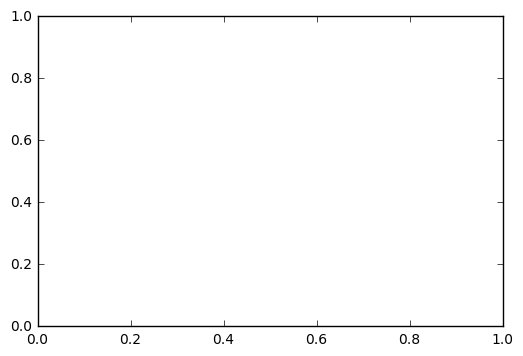

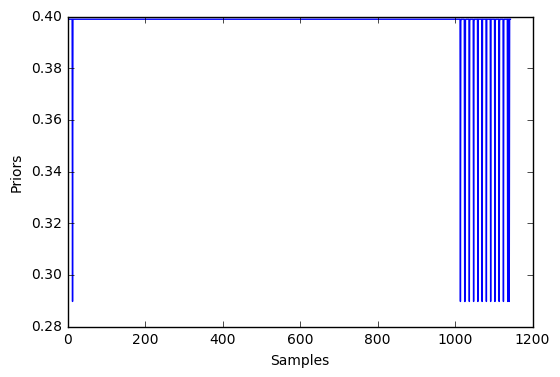

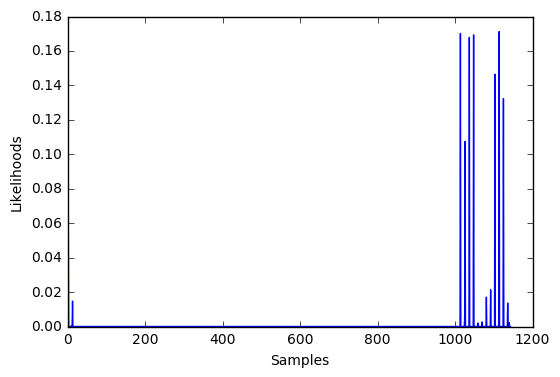

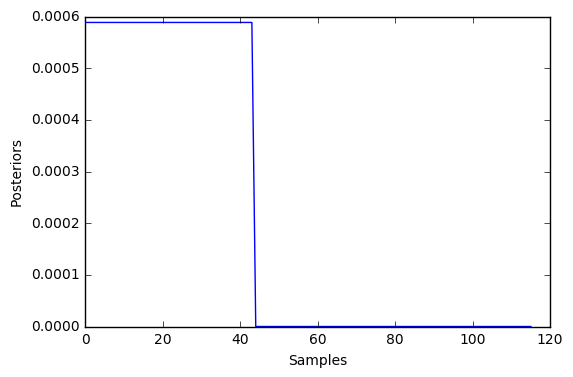

ValueError: x and y must not be None

In [52]:
#Generate trace plots for the afforementioned lists 
fig,ax=plt.subplots()
ax.plot(priors)
x=ax.set(xlabel='Samples',ylabel='Priors')
plt.show()

fig,ax=plt.subplots()
ax.plot(likelihoods)
x=ax.set(xlabel='Samples',ylabel='Likelihoods')
plt.show()

fig,ax=plt.subplots()
ax.plot(posteriors)
x=ax.set(xlabel='Samples',ylabel='Posteriors')
plt.show()

fig,ax=plt.subplots()
ax.plot(MCMC_sampler_run)
x=ax.set(xlabel='Samples',ylabel='')
plt.show()

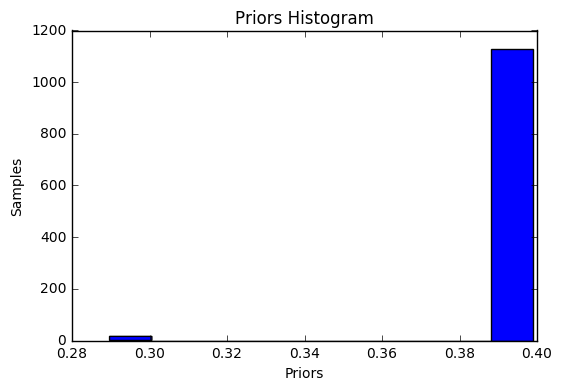

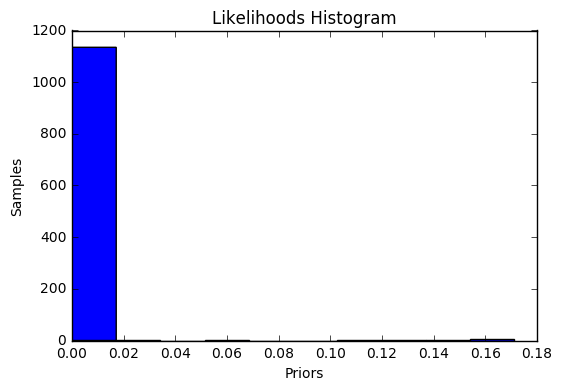

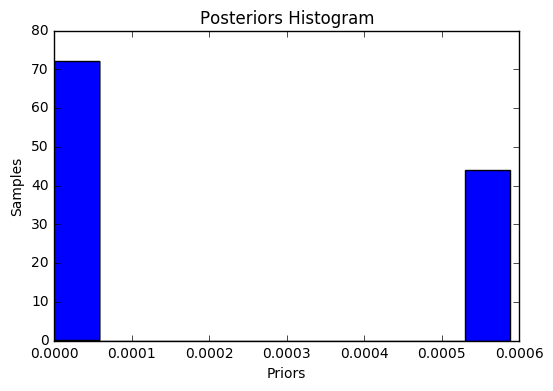

TypeError: 'NoneType' object is not iterable

In [53]:
#Histogram of priors
plt.hist(priors)
plt.title("Priors Histogram")
plt.xlabel("Priors")
plt.ylabel("Samples")
plt.show()

#Histogram of likelihoods
plt.hist(likelihoods)
plt.title("Likelihoods Histogram")
plt.xlabel("Priors")
plt.ylabel("Samples")
plt.show()

#Histogram of posteriors
plt.hist(posteriors)
plt.title("Posteriors Histogram")
plt.xlabel("Priors")
plt.ylabel("Samples")
plt.show()

#Histogram of MCMC_sampler results
plt.hist(MCMC_sampler_run)
plt.title("MCMC sampler Histogram")
plt.xlabel("Priors")
plt.ylabel("Samples")
plt.show()